<a href="https://colab.research.google.com/github/Kim-JH-01/AI_lab_Juhun/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Ïú†ÌäúÎ∏å Îã§Ïö¥Î°úÎçî Î∞è Ïò§ÎîîÏò§ Ï≤òÎ¶¨ ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò
!pip install -q yt-dlp

# FFmpeg ÏÑ§Ïπò (torchaudioÍ∞Ä Ïò§ÎîîÏò§ Ìè¨Îß∑ÏùÑ Îã§Î£®Í∏∞ ÏúÑÌï¥ ÌïÑÏöî)
!apt-get -qq update && apt-get -qq install -y ffmpeg

# ÌïÑÏàò ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
import torch
import torchaudio
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import Audio

print("‚úÖ ÌôòÍ≤Ω ÏÑ§Ï†ï ÏôÑÎ£å!")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
‚úÖ ÌôòÍ≤Ω ÏÑ§Ï†ï ÏôÑÎ£å!


In [16]:
# ÌÖçÏä§Ìä∏Î°ú Î≥ÄÌôòÌï† Ïú†ÌäúÎ∏å ÏòÅÏÉÅ URL
youtube_url = "https://www.youtube.com/shorts/HAHHQO3h6Ag" # <--- Î≥ÄÌôòÌï† ÏòÅÏÉÅ Ï£ºÏÜåÎ°ú Î≥ÄÍ≤Ω

# yt-dlpÎ°ú Ïò§ÎîîÏò§Îßå m4a Ìè¨Îß∑ÏúºÎ°ú Îã§Ïö¥Î°úÎìú
output_filename = "youtube_audio.m4a"
!yt-dlp -x --audio-format m4a -o "{output_filename}" {youtube_url}

downloaded_filepath = Path(output_filename)
if downloaded_filepath.exists():
    print(f"‚úÖ Ïò§ÎîîÏò§ Ï∂îÏ∂ú ÏôÑÎ£å: {downloaded_filepath.name}")
    display(Audio(str(downloaded_filepath))) # ÏõêÎ≥∏ ÏÜåÎ¶¨ Îì§Ïñ¥Î≥¥Í∏∞
else:
    print(f"‚ùå Ïò§ÎîîÏò§ Ï∂îÏ∂ú Ïã§Ìå®.")

[youtube] Extracting URL: https://www.youtube.com/shorts/HAHHQO3h6Ag
[youtube] HAHHQO3h6Ag: Downloading webpage
[youtube] HAHHQO3h6Ag: Downloading tv client config
[youtube] HAHHQO3h6Ag: Downloading tv player API JSON
[youtube] HAHHQO3h6Ag: Downloading web safari player API JSON
[youtube] HAHHQO3h6Ag: Downloading m3u8 information
[info] HAHHQO3h6Ag: Downloading 1 format(s): 251
[download] Sleeping 3.00 seconds as required by the site...
[download] Destination: youtube_audio.webm
[download] 100% of  257.49KiB in 00:00:00 at 460.32KiB/s
[ExtractAudio] Destination: youtube_audio.m4a
Deleting original file youtube_audio.webm (pass -k to keep)
‚úÖ Ïò§ÎîîÏò§ Ï∂îÏ∂ú ÏôÑÎ£å: youtube_audio.m4a


In [17]:
# Wav2Vec2 Î™®Îç∏ Î≤àÎì§ Î°úÎìú (Ï†ïÎ≥¥ ÌôïÏù∏Ïö©)
bundle = torchaudio.pipelines.WAV2VEC2_ASR_BASE_960H

# Ïò§ÎîîÏò§ ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
waveform, sample_rate = torchaudio.load(downloaded_filepath)

# ÏÉòÌîåÎßÅ Î†àÏù¥Ìä∏Í∞Ä Î™®Îç∏ ÏöîÍµ¨ÏÇ¨Ìï≠Í≥º Îã§Î•¥Î©¥ Î¶¨ÏÉòÌîåÎßÅ
if sample_rate != bundle.sample_rate:
    print(f"Î¶¨ÏÉòÌîåÎßÅ ÏàòÌñâ: {sample_rate} Hz -> {bundle.sample_rate} Hz")
    waveform = torchaudio.functional.resample(waveform, sample_rate, bundle.sample_rate)

print("‚úÖ Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å!")

Î¶¨ÏÉòÌîåÎßÅ ÏàòÌñâ: 48000 Hz -> 16000 Hz
‚úÖ Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å!



--- ÏãúÍ∞ÅÌôî Í≤∞Í≥º ---


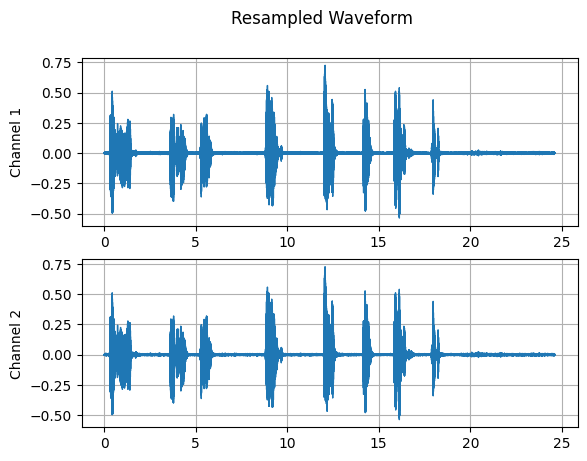

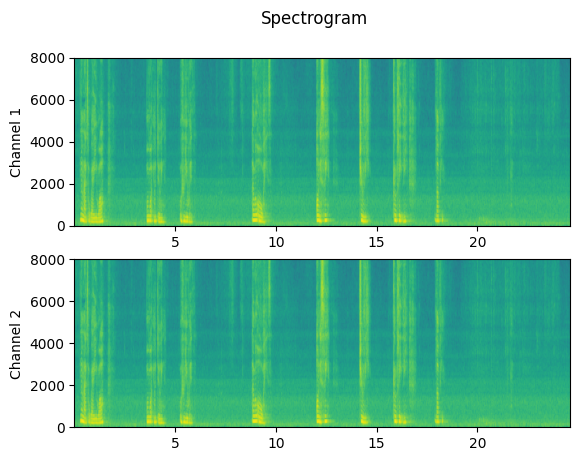

In [18]:
# --- ÏãúÍ∞ÅÌôîÏóê ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ---
import matplotlib.pyplot as plt
import torch

# --- ÏãúÍ∞ÅÌôî Ìï®Ïàò Ï†ïÏùò (Feature Extraction ÌäúÌÜ†Î¶¨ÏñºÏóêÏÑú Í∞ÄÏ†∏Ïò¥) ---

def plot_waveform(waveform, sr, title="Waveform"):
    """Ïò§ÎîîÏò§ ÌååÌòï(Waveform)ÏùÑ Í∑∏Î¶¨Îäî Ìï®Ïàò"""
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sr

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)
    plt.show()

def plot_specgram(waveform, sr, title="Spectrogram"):
    """Ïä§ÌéôÌä∏Î°úÍ∑∏Îû®(Spectrogram)ÏùÑ Í∑∏Î¶¨Îäî Ìï®Ïàò"""
    waveform = waveform.numpy()

    num_channels, _ = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sr)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)
    plt.show()

# --- ÏãúÍ∞ÅÌôî Ïã§Ìñâ ---
# 3Îã®Í≥ÑÏóêÏÑú Î¶¨ÏÉòÌîåÎßÅÎêú waveformÍ≥º Î™®Îç∏Ïùò ÏÉòÌîåÎßÅ Î†àÏù¥Ìä∏(bundle.sample_rate)Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
print("\n--- ÏãúÍ∞ÅÌôî Í≤∞Í≥º ---")
plot_waveform(waveform, bundle.sample_rate, title="Resampled Waveform")
plot_specgram(waveform, bundle.sample_rate, title="Spectrogram")

In [19]:
# --- GPU ÏÑ§Ï†ï Î∞è Î™®Îç∏/Îç∞Ïù¥ÌÑ∞ Ïù¥Îèô ---
# ColabÏóêÏÑúÎäî Î≥¥ÌÜµ GPU ÏÇ¨Ïö©Ïù¥ Í∞ÄÎä•Ìï©ÎãàÎã§.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Ïù¥Ï†ÑÏóê Ï†ïÏùòÎêú bundleÍ≥º waveform Î≥ÄÏàòÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
model = bundle.get_model().to(device)
waveform = waveform.to(device)

# --- Î™®Îç∏ÏùÑ ÌÜµÌï¥ Î°úÏßì(emission) Ï∂îÏ∂ú ---
# emissionÏùÄ Í∞Å ÏãúÍ∞Ñ ÌîÑÎ†àÏûÑÎ≥ÑÎ°ú Ïñ¥Îñ§ Í∏ÄÏûêÏùº ÌôïÎ•†Ïù¥ ÎÜíÏùÄÏßÄÏóê ÎåÄÌïú Ï†êÏàòÌëúÏûÖÎãàÎã§.
print("\nÎ™®Îç∏ÏùÑ ÌÜµÌï¥ ÌÖçÏä§Ìä∏ ÏòàÏ∏°ÏùÑ ÏãúÏûëÌï©ÎãàÎã§...")
with torch.inference_mode():
    emission, _ = model(waveform)
print("‚úÖ ÏòàÏ∏° ÏôÑÎ£å!")

# --- Greedy ÎîîÏΩîÎçîÎ°ú ÌÖçÏä§Ìä∏ Î≥ÄÌôò ---

# GreedyCTCDecoder ÌÅ¥ÎûòÏä§ Ï†ÑÏ≤¥ Ï†ïÏùò
class GreedyCTCDecoder(torch.nn.Module):
    def __init__(self, labels, blank=0):
        super().__init__()
        self.labels = labels
        self.blank = blank

    def forward(self, emission: torch.Tensor) -> str:
        """
        Ï£ºÏñ¥ÏßÑ Î°úÏßì(emission) ÏãúÌÄÄÏä§Î°úÎ∂ÄÌÑ∞ Í∞ÄÏû• Í∞ÄÎä•ÏÑ± ÏûàÎäî Í≤ΩÎ°úÏùò Î¨∏ÏûêÏó¥ÏùÑ Ï∞æÏäµÎãàÎã§.

        Args:
          emission (Tensor): Î°úÏßì ÌÖêÏÑú. Shape: `[num_seq, num_label]`

        Returns:
          str: ÏµúÏ¢Ö Î≥ÄÌôòÎêú ÌÖçÏä§Ìä∏
        """
        # 1. Í∞Å ÏãúÍ∞Ñ ÌîÑÎ†àÏûÑÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ Ï†êÏàòÎ•º Í∞ÄÏßÑ Í∏ÄÏûêÏùò Ïù∏Îç±Ïä§Î•º Ï∞æÏäµÎãàÎã§.
        indices = torch.argmax(emission, dim=-1)

        # 2. Ïó∞ÏÜçÏúºÎ°ú Î∞òÎ≥µÎêòÎäî Ïù∏Îç±Ïä§Î•º ÌïòÎÇòÎ°ú Ìï©Ïπ©ÎãàÎã§. (Ïòà: [1, 1, 1, 2, 2] -> [1, 2])
        indices = torch.unique_consecutive(indices, dim=-1)

        # 3. 'blank' ÌÜ†ÌÅ∞(Ïù∏Îç±Ïä§ 0)ÏùÑ Ï†úÍ±∞Ìï©ÎãàÎã§.
        indices = [i for i in indices if i != self.blank]

        # 4. ÏµúÏ¢Ö Ïù∏Îç±Ïä§ Î™©Î°ùÏùÑ Ïã§Ï†ú Í∏ÄÏûêÎ°ú Î≥ÄÌôòÌïòÏó¨ ÌïòÎÇòÏùò Î¨∏ÏûêÏó¥Î°ú Ìï©Ïπ©ÎãàÎã§.
        return "".join([self.labels[i] for i in indices])


# ÎîîÏΩîÎçî Í∞ùÏ≤¥ ÏÉùÏÑ±
decoder = GreedyCTCDecoder(labels=bundle.get_labels())
# ÎîîÏΩîÎî© Ïã§Ìñâ
transcript = decoder(emission[0])


# --- ÏÑúÏãù Î≥ÄÌôò Ìï®Ïàò Ï†ïÏùò ---
def format_transcript(raw_transcript):
  """
  Wav2Vec2Ïùò ÏõêÎ≥∏ Ï∂úÎ†• ÌÖçÏä§Ìä∏Î•º Î≥¥Í∏∞ Ï¢ãÏùÄ Î¨∏Ïû•ÏúºÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§.
  """
  sentence = raw_transcript.replace('|', ' ')
  sentence = sentence.capitalize()
  sentence = sentence.strip()
  return sentence

# --- ÏµúÏ¢Ö Î≥ÄÌôò Í≤∞Í≥º Ï∂úÎ†• ---
print("\n--- üìù ÏµúÏ¢Ö Î≥ÄÌôò Í≤∞Í≥º ---")

# ÏõêÎ≥∏ Ï∂úÎ†•Í≥º Î≥ÄÌôòÎêú Ï∂úÎ†•ÏùÑ Ìï®Íªò Î≥¥Ïó¨Ï§çÎãàÎã§.
print(f"ÏõêÎ≥∏: {transcript}")
print(f"Î≥ÄÌôò: {format_transcript(transcript)}")

Using device: cuda

Î™®Îç∏ÏùÑ ÌÜµÌï¥ ÌÖçÏä§Ìä∏ ÏòàÏ∏°ÏùÑ ÏãúÏûëÌï©ÎãàÎã§...
‚úÖ ÏòàÏ∏° ÏôÑÎ£å!

--- üìù ÏµúÏ¢Ö Î≥ÄÌôò Í≤∞Í≥º ---
ÏõêÎ≥∏: NO|MATTER|WHERE|YOU|ARE|OR|WHAT|YOU|ARE|DOING|WHO|YOU|WIT|I|WILL|ALWAYS|HONESTLY|TRULY|COMPLETELY|LOVE|YOU|
Î≥ÄÌôò: No matter where you are or what you are doing who you wit i will always honestly truly completely love you
